In [1]:
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg 
from wind_data_processing import * 
from calc_lcoe import * 
from scaling_battery import * 
from plots import * 

"""
Winddaten sowie technische Daten der Turbinen und Leistungskurven einlesen
Anschließend werden aus den Daten die Leistungen der Turbinen stundengenau ermittelt
"""
data_wind_path = r'data/Wetterdaten_Wanna_Szenario_1.txt'  # Dateipfad zu den Wetterdaten
save_path_powerdata = r'data/Wetterdaten_Wanna_Szenario_1.xlsx'     # Dateipfad zur Speicherung der Daten in einer xlsx
data_power_curve_path = r'data/powercurves_interpolated.csv'  # Dateipfad zur Leistungskurve
data_tech_path = 'data/technical_information.xlsx'  # Dateipfad zu den technischen Daten

# hub_height = 80.0  # Nabenhöhe der Windenergieanlage
roughness_length =      0.1  # Rauhigkeitslänge
p_min =                 .300  #kW
single_cell_energy =    5120 / 1000 # kWh
single_cell_cost =      1700    # €
interest_rate=          0.04    #
lifetime=               20      # a
capex=                  4500    # €/kW

## stündliche Leistungsdaten berechnen


In [2]:
data_wind = process_data(data_wind_path, data_power_curve_path, data_tech_path, save_path_powerdata, roughness_length)
data_wind.to_excel(save_path_powerdata)

  0%|                                                                                          | 0/335 [00:00<?, ?it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_out = float(data_tech['Cutout wind speed:'][data_tech.index.str.startswith(turbine)])  # Abschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:111: FutureWarning: Calling float on a single element Series is deprecated and will raise a Ty

Adani 5.2-160  klappt nicht wegen cannot convert the series to <class 'float'>
AWT Inc. AWT-26 / WC-86  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
  1%|█▏                                                                                | 5/335 [00:03<03:40,  1.50it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

aerodyn SCD 8.0/168  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
  3%|██▏                                                                               | 9/335 [00:07<04:08,  1.31it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Alstom ECO 122/2700  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
  3%|██▋                                                                              | 11/335 [00:08<03:55,  1.37it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

AN Bonus 1000/54  klappt nicht wegen cannot convert the series to <class 'float'>
AN Bonus 1300/62  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
  4%|███▍                                                                             | 14/335 [00:10<03:23,  1.58it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
  5%|████▎                                                                            | 18/335 [00:16<06:14,  1.18s/it]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
  7%|█████▎                                                                           | 22/335 [00:23<08:15,  1.58s/it]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
  8%|██████▎                                                                          | 26/335 [00:29<07:46,  1.51s/it]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

ATB Riva Calzoni ATB 500.54  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
  8%|██████▊                                                                          | 28/335 [00:30<05:56,  1.16s/it]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Bonus B31/300  klappt nicht wegen cannot convert the series to <class 'float'>
Bonus B35/450  klappt nicht wegen cannot convert the series to <class 'float'>
Bonus B37/450  klappt nicht wegen cannot convert the series to <class 'float'>
Bonus B41/600  klappt nicht wegen cannot convert the series to <class 'float'>
Bonus B44/600  klappt nicht wegen cannot convert the series to <class 'float'>
Bonus B54/1000  klappt nicht wegen cannot convert the series to <class 'float'>
Bonus B62/1300  klappt nicht wegen cannot convert the series to <class 'float'>
Bonus B76/2000  klappt nicht wegen cannot convert the series to <class 'float'>
Bonus B82/2300  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 12%|█████████▉                                                                       | 41/335 [00:36<01:42,  2.87it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Carter CWT 300  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 13%|██████████▍                                                                      | 43/335 [00:37<01:55,  2.53it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

DWT Danish Wind Tech Windane 29  klappt nicht wegen cannot convert the series to <class 'float'>
DWT Danish Wind Tech Windane 31  klappt nicht wegen cannot convert the series to <class 'float'>
DWT Danish Wind Tech Windane 34   klappt nicht wegen cannot convert the series to <class 'float'>
DWT Danish Wind Tech Windane 34 US  klappt nicht wegen cannot convert the series to <class 'float'>
DWT Danish Wind Tech Windane 40  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 15%|████████████▎                                                                    | 51/335 [00:41<01:54,  2.48it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 16%|█████████████▎                                                                   | 55/335 [00:47<04:32,  1.03it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Danwin Danwin 23  klappt nicht wegen cannot convert the series to <class 'float'>
DeWind D4 48/600  klappt nicht wegen cannot convert the series to <class 'float'>
Dongfang G2000-116 / FD116-2000 geared  klappt nicht wegen cannot convert the series to <class 'float'>
ecotÃ¨cnia ECO 12/30  klappt nicht wegen cannot convert the series to <class 'float'>
ecotÃ¨cnia ECO 48/750  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 18%|██████████████▋                                                                  | 61/335 [00:49<02:26,  1.87it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Enercon E-18  klappt nicht wegen cannot convert the series to <class 'float'>
Enercon E-30   klappt nicht wegen cannot convert the series to <class 'float'>
Enercon E-33 / 300  klappt nicht wegen cannot convert the series to <class 'float'>
Enercon E-40/5.40  klappt nicht wegen cannot convert the series to <class 'float'>
Enercon E-40/6.44  klappt nicht wegen cannot convert the series to <class 'float'>
Enercon E-44  klappt nicht wegen cannot convert the series to <class 'float'>
Enercon E-48  klappt nicht wegen cannot convert the series to <class 'float'>
Enercon E-53  klappt nicht wegen cannot convert the series to <class 'float'>
Enercon E-58/10.58  klappt nicht wegen cannot convert the series to <class 'float'>
Enercon E-66/15.66  klappt nicht wegen cannot convert the series to <class 'float'>
Enercon E-66/18.70  klappt nicht wegen cannot convert the series to <class 'float'>
Enercon E-70 E4 2.300  klappt nicht wegen cannot convert the series to <class 'float'>
Enercon E-82 E2 2.30

C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 39%|██████████████████████████████▊                                                 | 129/335 [00:52<00:15, 13.48it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

HEAG HW1-780  klappt nicht wegen cannot convert the series to <class 'float'>
HEAG HW3/S2500(90)  klappt nicht wegen cannot convert the series to <class 'float'>
HEAG HW3/S2500(97)  klappt nicht wegen cannot convert the series to <class 'float'>
HEAG HW3/S2500(103)  klappt nicht wegen cannot convert the series to <class 'float'>
HEAG HW3/S2500(110)  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 41%|████████████████████████████████▍                                               | 136/335 [00:55<00:26,  7.53it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Lagerwey LW 52/750  klappt nicht wegen cannot convert the series to <class 'float'>
Lagerwey LW 58/750  klappt nicht wegen cannot convert the series to <class 'float'>
Lagerwey LW 72/2000  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 43%|██████████████████████████████████▏                                             | 143/335 [01:01<01:03,  3.01it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Leitwind LTW77 800  klappt nicht wegen cannot convert the series to <class 'float'>
Leitwind LTW77 850  klappt nicht wegen cannot convert the series to <class 'float'>
Leitwind LTW77 1000  klappt nicht wegen cannot convert the series to <class 'float'>
Leitwind LTW77 1500  klappt nicht wegen cannot convert the series to <class 'float'>
Leitwind LTW80 800  klappt nicht wegen cannot convert the series to <class 'float'>
Leitwind LTW80 850  klappt nicht wegen cannot convert the series to <class 'float'>
Leitwind LTW80 1000  klappt nicht wegen cannot convert the series to <class 'float'>
Leitwind LTW80 1500  klappt nicht wegen cannot convert the series to <class 'float'>
Leitwind LTW80 1650  klappt nicht wegen cannot convert the series to <class 'float'>
Leitwind LTW80 1800  klappt nicht wegen cannot convert the series to <class 'float'>
Leitwind LTW86 1000  klappt nicht wegen cannot convert the series to <class 'float'>
Leitwind LTW86 1500  klappt nicht wegen cannot convert the series to 

C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 49%|███████████████████████████████████████▍                                        | 165/335 [01:03<00:24,  6.84it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Micon M 530  klappt nicht wegen cannot convert the series to <class 'float'>
Mitsubishi MWT-250C  klappt nicht wegen cannot convert the series to <class 'float'>
Multibrid M5000  klappt nicht wegen cannot convert the series to <class 'float'>
NEG Micon NM 44/750  klappt nicht wegen cannot convert the series to <class 'float'>
NEG Micon NM 48/750  klappt nicht wegen cannot convert the series to <class 'float'>
NEG Micon NM 52/900  klappt nicht wegen cannot convert the series to <class 'float'>
NEG Micon NM 54/950  klappt nicht wegen cannot convert the series to <class 'float'>
NEG Micon NM 60/1000  klappt nicht wegen cannot convert the series to <class 'float'>
NEG Micon NM 72C/1500  klappt nicht wegen cannot convert the series to <class 'float'>
NEG Micon NM 72/1650  klappt nicht wegen cannot convert the series to <class 'float'>
NEG Micon NM 82/1500  klappt nicht wegen cannot convert the series to <class 'float'>
NEG Micon NM 82/1650  klappt nicht wegen cannot convert the series to <c

C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 53%|██████████████████████████████████████████▌                                     | 178/335 [01:04<00:21,  7.22it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Nordex N43  klappt nicht wegen cannot convert the series to <class 'float'>
Nordex N50  klappt nicht wegen cannot convert the series to <class 'float'>
Nordex N60  klappt nicht wegen cannot convert the series to <class 'float'>
Nordex N62  klappt nicht wegen cannot convert the series to <class 'float'>
Nordex N70  klappt nicht wegen cannot convert the series to <class 'float'>
Nordex N77  klappt nicht wegen cannot convert the series to <class 'float'>
Nordex N80 Alpha  klappt nicht wegen cannot convert the series to <class 'float'>
Nordex N90 Beta  klappt nicht wegen cannot convert the series to <class 'float'>
Nordex N90/2500  klappt nicht wegen cannot convert the series to <class 'float'>
Nordex N100 Delta  klappt nicht wegen cannot convert the series to <class 'float'>
Nordex N100 Gamma  klappt nicht wegen cannot convert the series to <class 'float'>
Nordex N117 Delta  klappt nicht wegen cannot convert the series to <class 'float'>
Nordex N117 Gamma  klappt nicht wegen cannot conver

C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 59%|███████████████████████████████████████████████▎                                | 198/335 [01:09<00:20,  6.58it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Nordtank NTK 400  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 60%|████████████████████████████████████████████████                                | 201/335 [01:11<00:34,  3.83it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Norwin 47 ASR 500  klappt nicht wegen cannot convert the series to <class 'float'>
PowerWind PW56  klappt nicht wegen cannot convert the series to <class 'float'>
REpower 48/600  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 62%|█████████████████████████████████████████████████▋                              | 208/335 [01:17<00:55,  2.29it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

S&G Engineering SG2500.131 DD  klappt nicht wegen cannot convert the series to <class 'float'>
S&G Engineering SG2700.100 DD  klappt nicht wegen cannot convert the series to <class 'float'>
S&G Engineering SG2700.116 DD  klappt nicht wegen cannot convert the series to <class 'float'>
SANY SE8220  klappt nicht wegen cannot convert the series to <class 'float'>
SANY SE8720  klappt nicht wegen cannot convert the series to <class 'float'>
SANY SE9315  klappt nicht wegen cannot convert the series to <class 'float'>
SANY SE9320  klappt nicht wegen cannot convert the series to <class 'float'>
SANY SE10015  klappt nicht wegen cannot convert the series to <class 'float'>
SANY SE10020  klappt nicht wegen cannot convert the series to <class 'float'>
SANY SE11520  klappt nicht wegen cannot convert the series to <class 'float'>
SANY SE11525  klappt nicht wegen cannot convert the series to <class 'float'>
SANY SE12120  klappt nicht wegen cannot convert the series to <class 'float'>
SANY SE12125  kla

C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 73%|██████████████████████████████████████████████████████████▎                     | 244/335 [01:18<00:08, 10.12it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

SÃ¼dwind S-70  klappt nicht wegen cannot convert the series to <class 'float'>
SÃ¼dwind S-70 (special nacelle)  klappt nicht wegen cannot convert the series to <class 'float'>
SÃ¼dwind S-77  klappt nicht wegen cannot convert the series to <class 'float'>
Suzlon S.33-350  klappt nicht wegen cannot convert the series to <class 'float'>
Suzlon S.60-1000  klappt nicht wegen cannot convert the series to <class 'float'>
Suzlon S.62-1000  klappt nicht wegen cannot convert the series to <class 'float'>
Suzlon S.64-950  klappt nicht wegen cannot convert the series to <class 'float'>
Suzlon S.64-1000  klappt nicht wegen cannot convert the series to <class 'float'>
Suzlon S.64-1250  klappt nicht wegen cannot convert the series to <class 'float'>
Suzlon S.66-1250  klappt nicht wegen cannot convert the series to <class 'float'>
Suzlon S.88-2100  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 76%|█████████████████████████████████████████████████████████████▏                  | 256/335 [01:19<00:08,  9.28it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Tacke TW 500  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 77%|█████████████████████████████████████████████████████████████▊                  | 259/335 [01:23<00:16,  4.75it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

TURBOWINDS T400-34  klappt nicht wegen cannot convert the series to <class 'float'>
TURBOWINDS T600-48  klappt nicht wegen cannot convert the series to <class 'float'>
Unison U54  klappt nicht wegen cannot convert the series to <class 'float'>
Vensys 77/1500  klappt nicht wegen cannot convert the series to <class 'float'>
Vensys 82/1500  klappt nicht wegen cannot convert the series to <class 'float'>
Vensys 100/2500  klappt nicht wegen cannot convert the series to <class 'float'>
Vensys 109/2500  klappt nicht wegen cannot convert the series to <class 'float'>
Vensys 112/2500  klappt nicht wegen cannot convert the series to <class 'float'>
Vensys 120/3000  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 81%|████████████████████████████████████████████████████████████████▋               | 271/335 [01:27<00:17,  3.68it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Vergnet GEV HP 1000/62  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 81%|█████████████████████████████████████████████████████████████████▏              | 273/335 [01:29<00:20,  3.07it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Vergnet GEV MP R 275/32  klappt nicht wegen cannot convert the series to <class 'float'>
Vergnet GEV MP C 275/30  klappt nicht wegen cannot convert the series to <class 'float'>
Vestas V27  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 83%|██████████████████████████████████████████████████████████████████▍             | 278/335 [01:32<00:22,  2.56it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Vestas V39  klappt nicht wegen cannot convert the series to <class 'float'>
Vestas V42  klappt nicht wegen cannot convert the series to <class 'float'>
Vestas V44  klappt nicht wegen cannot convert the series to <class 'float'>
Vestas V47  klappt nicht wegen cannot convert the series to <class 'float'>
Vestas V52  klappt nicht wegen cannot convert the series to <class 'float'>
Vestas V66-1.65  klappt nicht wegen cannot convert the series to <class 'float'>
Vestas V66-1.75  klappt nicht wegen cannot convert the series to <class 'float'>
Vestas V80-1.8  klappt nicht wegen cannot convert the series to <class 'float'>
Vestas V90  klappt nicht wegen cannot convert the series to <class 'float'>
Vestas V90 Gridstreamer  klappt nicht wegen cannot convert the series to <class 'float'>
Vestas V100-1.8  klappt nicht wegen cannot convert the series to <class 'float'>
Vestas V112-3.0 Offshore  klappt nicht wegen cannot convert the series to <class 'float'>
Vestas V112-3.075 Onshore  klappt nicht we

C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 96%|████████████████████████████████████████████████████████████████████████████▉   | 322/335 [01:33<00:01, 11.46it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

WESPA 500/47  klappt nicht wegen cannot convert the series to <class 'float'>
WESPA 750/47  klappt nicht wegen cannot convert the series to <class 'float'>
Wind World (India) ww-53  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
 98%|██████████████████████████████████████████████████████████████████████████████  | 327/335 [01:36<00:01,  6.00it/s]C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cut_in = float(data_tech['Cutin wind speed:'][data_tech.index.str.startswith(turbine)])    # Einschaltdrehzahl der Windenergieanlage
C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:110: FutureWarning: Calling float on a singl

Windflow 45-500  klappt nicht wegen cannot convert the series to <class 'float'>
Windflow 33-500  klappt nicht wegen cannot convert the series to <class 'float'>
WindMaster / HMZ WM 300/25  klappt nicht wegen cannot convert the series to <class 'float'>
WindMaster / HMZ WM 600 VS45  klappt nicht wegen cannot convert the series to <class 'float'>


C:\Users\jonas\Documents\GitHub\Windenergieanlage\wind_data_processing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speeds[turbine] = power_values  # Leistungswerte als neue Spalte zum DataFrame hinzufügen
100%|████████████████████████████████████████████████████████████████████████████████| 335/335 [01:38<00:00,  3.42it/s]


WinWinD WWD-1 D56  klappt nicht wegen cannot convert the series to <class 'float'>
WinWinD WWD-1 D60  klappt nicht wegen cannot convert the series to <class 'float'>
WinWinD WWD-1 D64  klappt nicht wegen cannot convert the series to <class 'float'>


## LCOE berechnen

In [3]:
tech_lcoe = append_costs_df(capex, lifetime, interest_rate)
tech_lcoe.to_excel(data_tech_path)

## Scaling Battery


In [4]:
tech_battery = calculate_battery_cost(p_min, single_cell_energy, single_cell_cost, data_tech_path)
tech_battery.to_excel(data_tech_path)


C:\Users\jonas\Documents\GitHub\Windenergieanlage\scaling_battery.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech_infos['max Flauten time'][turbine] = max(calm_wind_duration)
C:\Users\jonas\Documents\GitHub\Windenergieanlage\scaling_battery.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech_infos['Flautenzeit'][turbine] = max(no_wind_duration)
C:\Users\jonas\Documents\GitHub\Windenergieanlage\scaling_battery.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

C:\Users\jonas\Documents\GitHub\Windenergieanlage\scaling_battery.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech_infos['max Flauten time'][turbine] = max(calm_wind_duration)
C:\Users\jonas\Documents\GitHub\Windenergieanlage\scaling_battery.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech_infos['Flautenzeit'][turbine] = max(no_wind_duration)
C:\Users\jonas\Documents\GitHub\Windenergieanlage\scaling_battery.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

## Plots

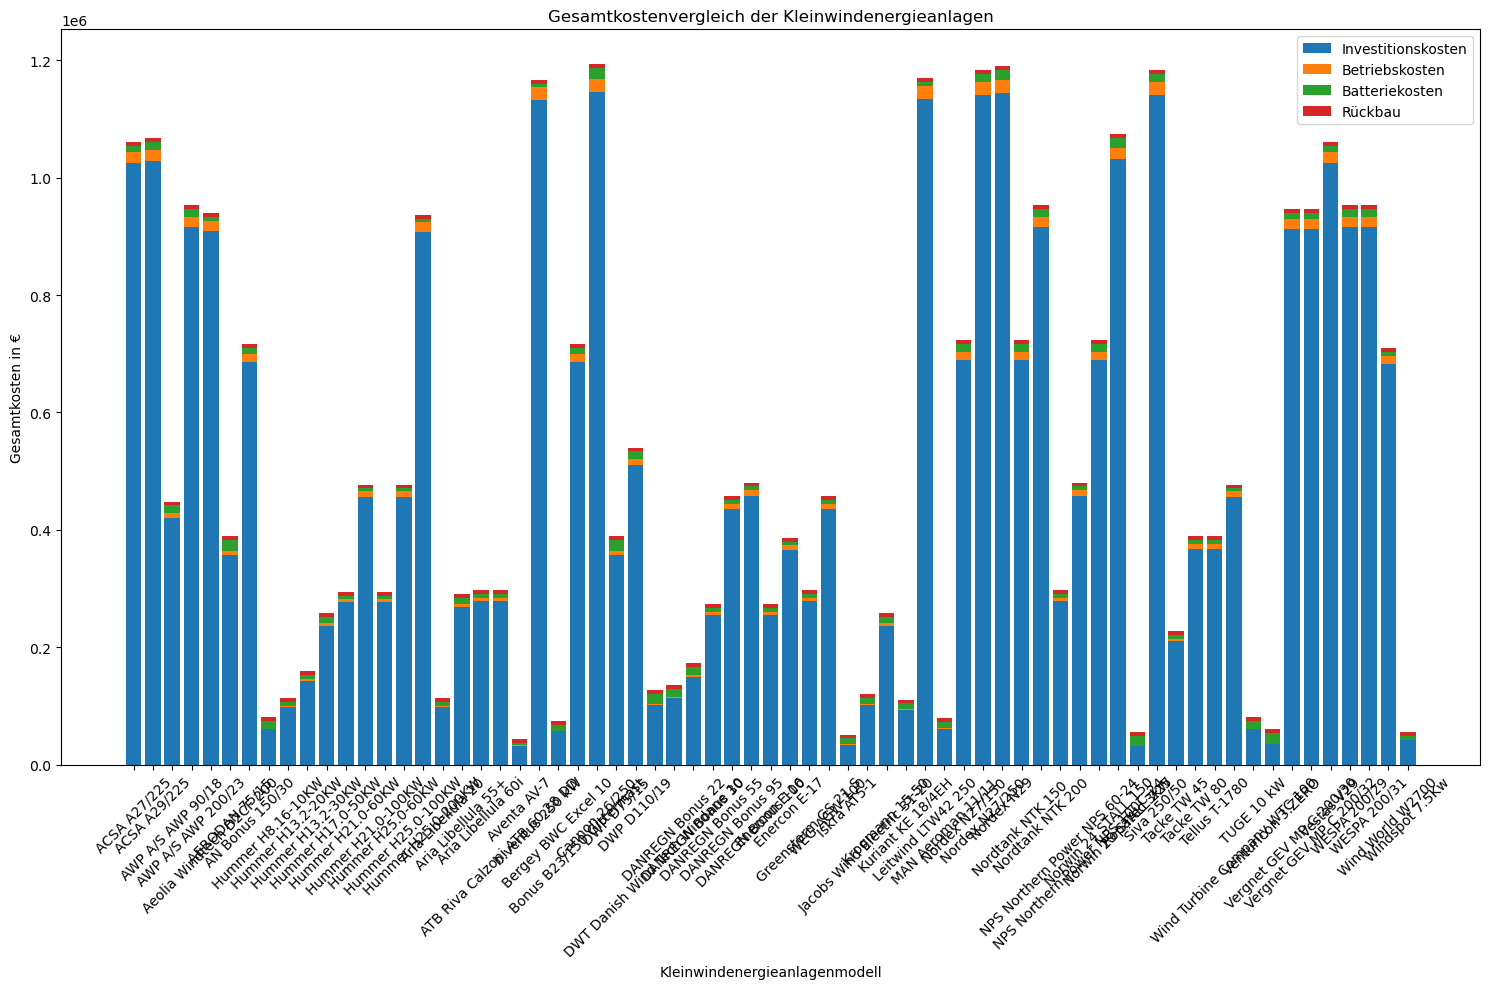

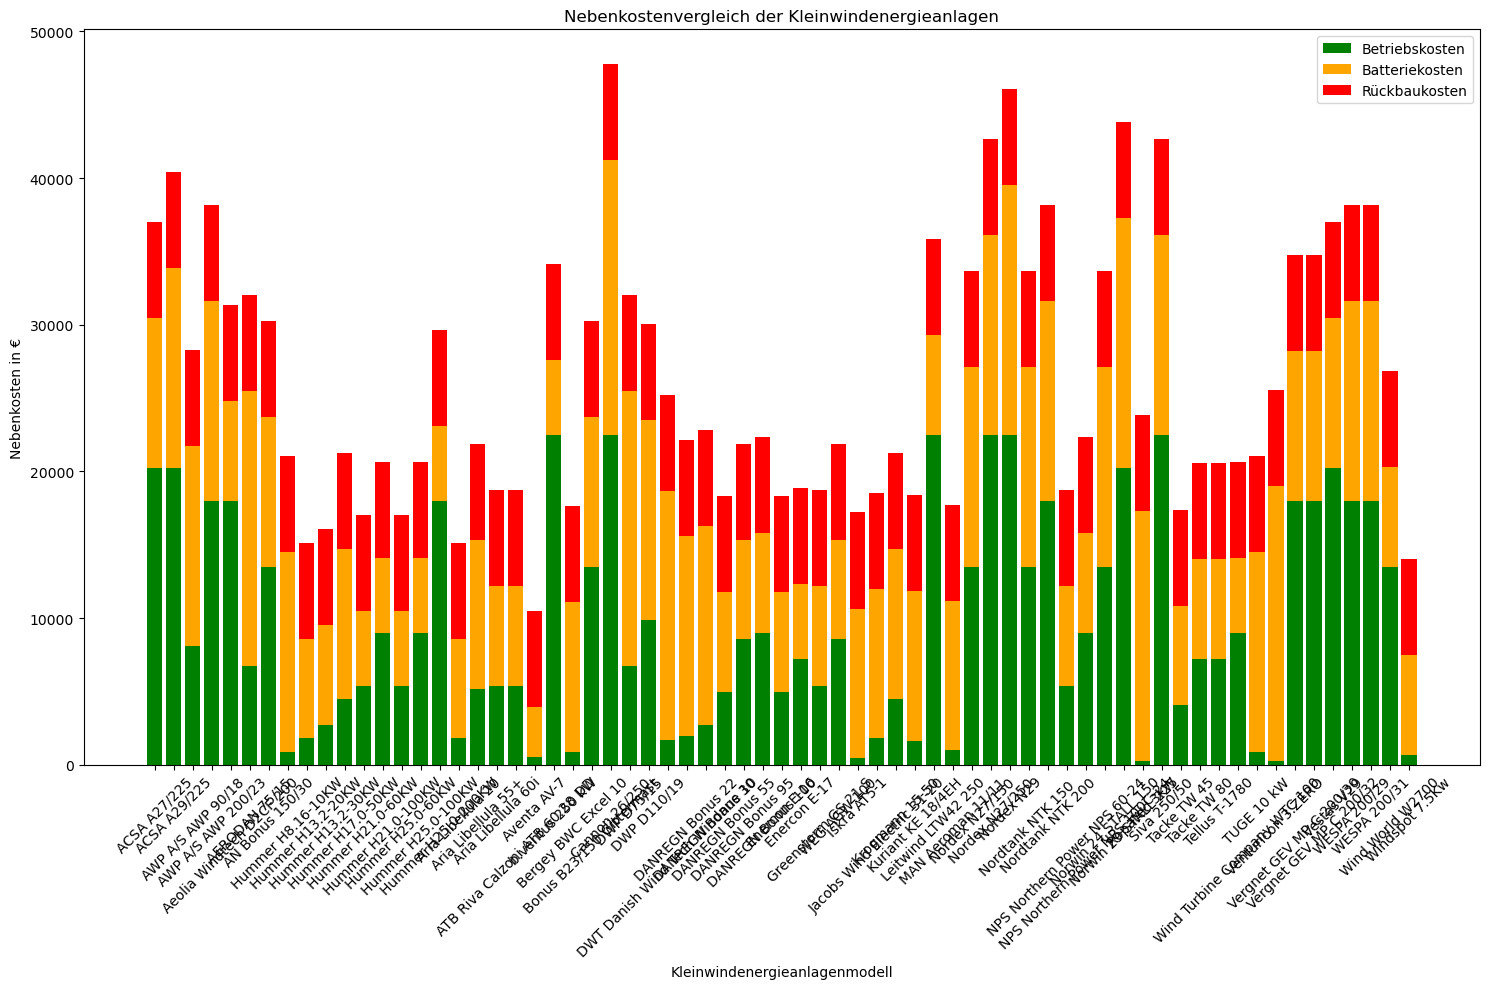

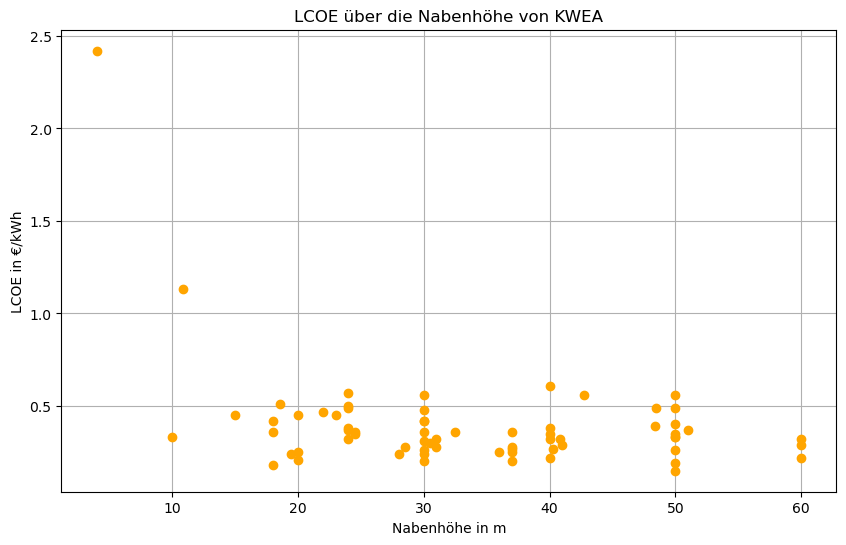

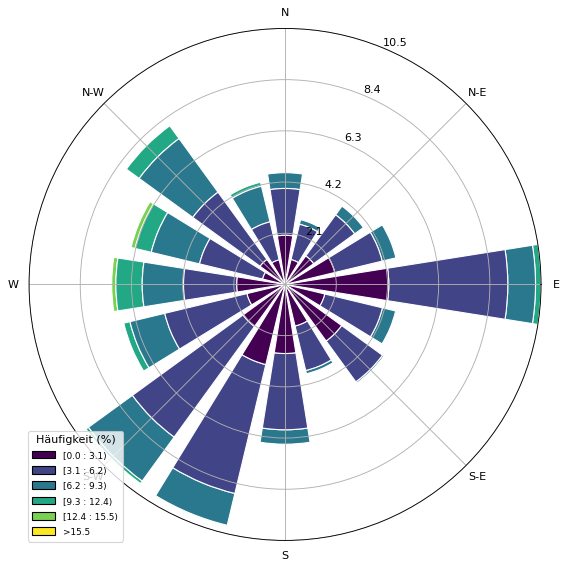

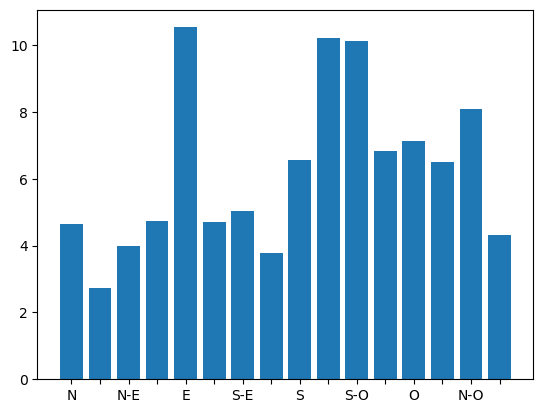

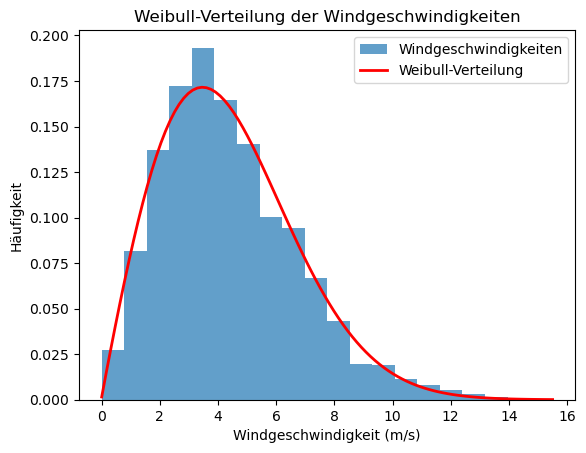

Weibull-Verteilungsfaktoren:
Formfaktor (Shape): 1.9792264954973389
Lagefaktor (Location): -0.016718391500960755
Skalenfaktor (Scale): 4.966110083072094


In [5]:
plot_all(data_tech_path)
